# FINAL PROJECT SECTIONX- TEAM AC

*Team Members*: Alec Anderson

AAI510: Machine Learning-Fundamentals

*Professor*: Dr. Som Shahapurkar

06/26/2023

**Problem Statement** There is a need to understand what climate conditions are and will be. The need for this is to have proper warning to a big storm or possible climate changes, such as rainfall, far enough in advance to be aware of some of the following:
- Possible natural disasters
- Flooding
- Rain fall for irrigation systems

**GOAL**: Create a model to accurratly predict percipitation levels.

**Data Source** The data used in this project was found on Kaggle and consists of climate/weather change data to correlate different environmental parameters during different weather situations.
- https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset



#Data Input
The following section will go over the input of data into the notebook and input any imports/pips needed to properly run this notebook.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.metrics import mean_squared_error as mse
# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.linear_model import LinearRegression
from keras.layers import Dense, Dropout, LSTM
from keras.layers.core import Activation
from keras.utils import pad_sequences
import tensorflow as tf
from tensorflow import keras
# Results
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in file and look at dataframe
climate_data = pd.read_csv('/content/drive/MyDrive/climate_change_data.csv')
climate_data.head(2)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300


# Exploratory Data Analysis and Feature Engineering
In the section we will go over the data and create an understanding for each variable and their relationship in this dataset. Additionally, we will detect and remove outliers for both numeric variables (Temperature, CO2 Emissions, etc) and

In [ ]:
# Check shape
climate_data.shape

(10000, 9)

In [ ]:
# Convert the Date column to datetime, and verify
climate_data['Date'] = pd.to_datetime(climate_data['Date'], format='%Y-%m-%d %H:%M:%S')
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


In [ ]:
# Check for missing values
missing_values = climate_data.isnull().sum()
print(missing_values)

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = climate_data.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


<ipython-input-8-ae3d71d40793>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = climate_data.corr()


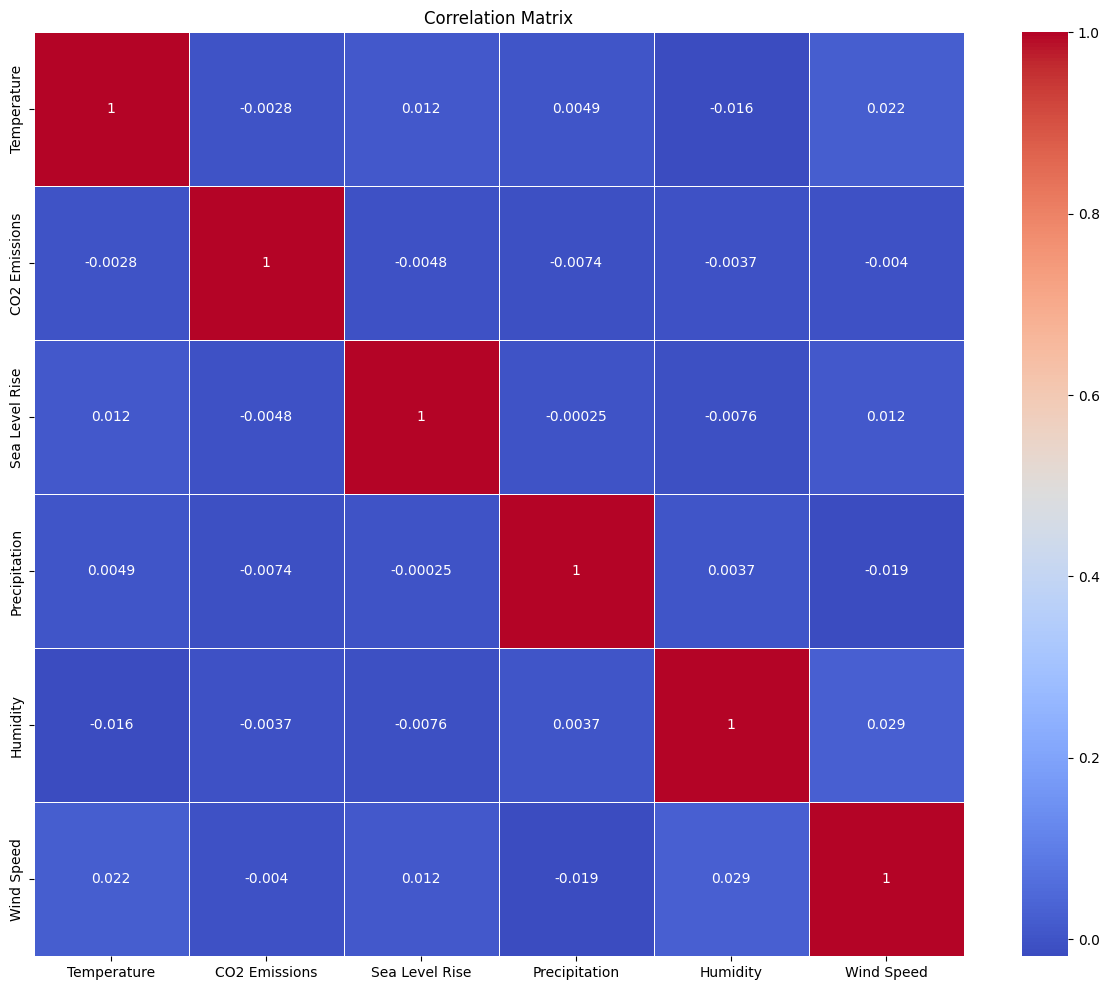

In [ ]:
# Correlation matrix
correlation_matrix = climate_data.corr()

# Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Group by country, and calculate the correlation between temperature and changes in other metrics
countries = climate_data.groupby('Country')

correlation_results = {}
for country, data in countries:
    correlations = data[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].corr()
    correlation_results[country] = correlations['Temperature'][1:]

# Display results
for country, correlations in correlation_results.items():
    print(f"Country: {country}")
    print(correlations)
    print()

Country: Afghanistan
CO2 Emissions     0.225938
Sea Level Rise   -0.021973
Precipitation     0.064500
Humidity          0.018055
Wind Speed       -0.059713
Name: Temperature, dtype: float64

Country: Albania
CO2 Emissions     0.034251
Sea Level Rise   -0.156123
Precipitation    -0.117339
Humidity          0.292979
Wind Speed       -0.050677
Name: Temperature, dtype: float64

Country: Algeria
CO2 Emissions    -0.220581
Sea Level Rise   -0.110030
Precipitation    -0.087149
Humidity          0.120158
Wind Speed        0.329683
Name: Temperature, dtype: float64

Country: American Samoa
CO2 Emissions     0.084107
Sea Level Rise   -0.002233
Precipitation     0.233035
Humidity         -0.382042
Wind Speed        0.045931
Name: Temperature, dtype: float64

Country: Andorra
CO2 Emissions    -0.109841
Sea Level Rise    0.178374
Precipitation     0.208938
Humidity          0.082867
Wind Speed       -0.093593
Name: Temperature, dtype: float64

Country: Angola
CO2 Emissions    -0.169193
Sea Level R

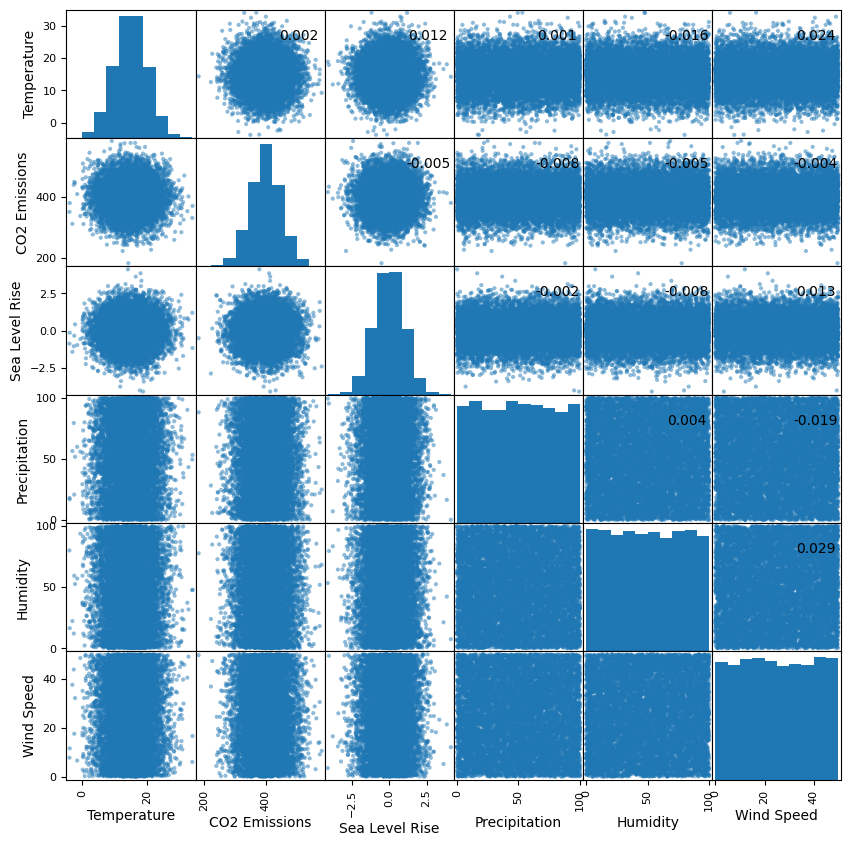

In [ ]:
#Displaying all variable to variable relationships
axes = pd.plotting.scatter_matrix(climate_data[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']], alpha=0.5,figsize = [10,10])
corr = climate_data[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

There are no apparent variable to variable strong relationships as you can see from an importance list standpoitn previously and a graphical standpoint. Now this could be due to the large amoiunt of data accross many locations so we will go into an outlier detection to try and fien tune the data.

In [ ]:
# Compute z-scores for numerical columns and define a threshold
numerical_columns = ['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']
z_scores = np.abs((climate_data[numerical_columns] - climate_data[numerical_columns].mean()) / climate_data[numerical_columns].std())
threshold = 2

# Detect outliers and remove rows that contain them
outlier_mask = (z_scores > threshold).any(axis=1)
climate_data = climate_data[~outlier_mask]

# Print the shape to view how many rows were removed
climate_data.shape

(8690, 9)

In [ ]:
## Outlier detection for Locations per Country

# Find unique locations per country, sort and display results
unique_locations_per_country = climate_data.groupby('Country')['Location'].nunique().reset_index()
unique_locations_per_country = unique_locations_per_country.sort_values(by='Location', ascending=False)
pd.set_option('display.max_rows', None)
print(unique_locations_per_country)


                                               Country  Location
49                                               Congo        81
114                                              Korea        69
214                                           Tanzania        53
50                                        Cook Islands        50
73                                       French Guiana        50
177                                            Reunion        50
10                                             Armenia        48
208                                          Swaziland        47
226                                             Uganda        47
5                                               Angola        46
118                                             Latvia        46
195                                       Sierra Leone        46
27                                            Botswana        46
113                                           Kiribati        46
123                      

In [ ]:
# Compute z-scores and define threshold
z_scores = (unique_locations_per_country['Location'] - unique_locations_per_country['Location'].mean()) / unique_locations_per_country['Location'].std()
threshold = 2

outlier_mask = np.abs(z_scores) > threshold

# Filter out rows containing outliers
outliers = unique_locations_per_country[outlier_mask]
print(outliers)

              Country  Location
49              Congo        81
114             Korea        69
214          Tanzania        53
50       Cook Islands        50
73      French Guiana        50
177           Reunion        50
133  Marshall Islands        20


In [ ]:
# Remove rows containing outliers
cleaned_data = unique_locations_per_country[~outlier_mask]

# Merge
climate_data = climate_data.merge(cleaned_data, on='Country')

# Print the shape and view how many observations were lost
climate_data.shape

(8317, 10)

Outliers were removed based off of group decision of removing locations outside the 29-44 data point range. Anything less was dictated as zero value added and anything more was determined to be a potenial for data skewing.

# Initial Testing and Visualizations

In this section:



*   **Random Forest Regressor** to identify the top features for target variable Precipitation
*   **Long Short-Term Memory** model, test MSE, RMSE, MAE, R2
*   **Decision Tree Regressor** model, test metrics
*   **Gradient Boosting Regressor** model, test metrics
*   **Time-Series** Assess variables over time



In [ ]:
# Feature Importance - Precipitation
X = climate_data[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Humidity', 'Wind Speed']]
y = climate_data['Precipitation']

# Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)

# Get importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

          Feature  Importance
0     Temperature    0.202325
4      Wind Speed    0.200948
1   CO2 Emissions    0.200297
3        Humidity    0.198283
2  Sea Level Rise    0.198146


**LSTM, Decision Tree, and Random Forest**

In [ ]:
# LTSM

# Assign x and y, perform train-test split
x = climate_data[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Humidity', 'Wind Speed']].values
y = climate_data['Precipitation'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Reshape the input data for LSTM
n_steps = 1
n_features = x_train.shape[1]

x_train = x_train.reshape((x_train.shape[0], n_steps, n_features))
x_test = x_test.reshape((x_test.shape[0], n_steps, n_features))

# Train model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Make predictions, calculate metrics
y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Epoch 1/100
208/208 [==============================] - 2s 2ms/step - loss: 3245.4219
Epoch 2/100
208/208 [==============================] - 0s 2ms/step - loss: 2546.7007
Epoch 3/100
208/208 [==============================] - 1s 3ms/step - loss: 1457.2555
Epoch 4/100
208/208 [==============================] - 1s 4ms/step - loss: 979.0577
Epoch 5/100
208/208 [==============================] - 1s 3ms/step - loss: 908.6876
Epoch 6/100
208/208 [==============================] - 1s 4ms/step - loss: 897.4304
Epoch 7/100
208/208 [==============================] - 1s 3ms/step - loss: 891.2076
Epoch 8/100
208/208 [==============================] - 0s 2ms/step - loss: 886.2635
Epoch 9/100
208/208 [==============================] - 1s 3ms/step - loss: 882.2783
Epoch 10/100
208/208 [==============================] - 1s 3ms/step - loss: 878.0048
Epoch 11/100
208/208 [==============================] - 1s 3ms/step - loss: 874.2531
Epoch 12/100
208/208 [==============================] - 1s 4ms/step - l

In [ ]:
# Re-assign x and y, perform Decision Tree and Gradient Boosting Regressor Calculations
x = climate_data[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Humidity', 'Wind Speed']]
y = climate_data['Precipitation']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1707.1174917198364
Root Mean Squared Error (RMSE): 41.317278367770506
Mean Absolute Error (MAE): 33.537792864217735
R-squared (R2) Score: -1.078565019798793


In [ ]:
# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

y_pred = gb_model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 825.7403731546284
Root Mean Squared Error (RMSE): 28.73569858476784
Mean Absolute Error (MAE): 24.86950830993823
R-squared (R2) Score: -0.0054112053797013004


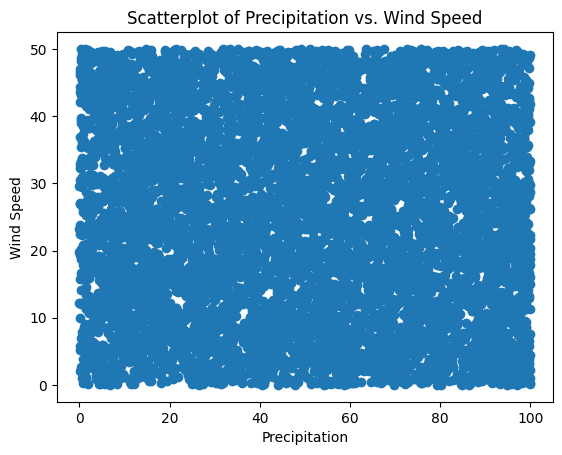

In [ ]:
# Scatterplot for Precipitation and Wind Speed
plt.scatter(climate_data['Precipitation'], climate_data['Wind Speed'])
plt.xlabel('Precipitation')
plt.ylabel('Wind Speed')
plt.title('Scatterplot of Precipitation vs. Wind Speed')
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

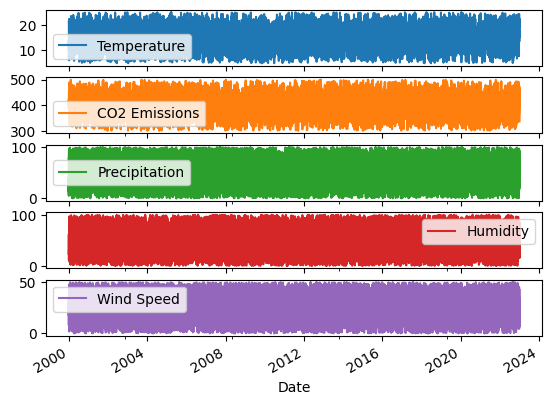

In [ ]:
#Creating initial subplots to assess any trends in the variable data.
climate_data.plot('Date',['Temperature','CO2 Emissions','Precipitation','Humidity','Wind Speed'],subplots=True)

An initial assessment shows no trends when using all locations as expected due to world wide variation

In [ ]:
#Here we will reassess with a monthly average
#making a copy of the datset to play with monthly averages
dfmonthly=climate_data
#Creating a month collumn from the date data
dfmonthly['month'] = pd.to_datetime(dfmonthly['Date']).dt.month
#Creating a year collumn from the date data
dfmonthly['year'] = pd.to_datetime(dfmonthly['Date']).dt.year
#Setting colsm to be the new year and month collumn
colsm=["year","month"]
#Combining the year and month collumn into a single monthly collumn
dfmonthly['Monthly'] = dfmonthly[colsm].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Changing the dtype to datetime for the new monthly collumn
dfmonthly['Monthly']= pd.to_datetime(dfmonthly['Monthly'], format='%Y-%m')
#Calculating a monthly average
dfmonthly2=dfmonthly.groupby(['Monthly'],as_index=False).mean()
#Testing new dataframe
dfmonthly2.head()

<ipython-input-23-59cf8ce60aab>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmonthly2=dfmonthly.groupby(['Monthly'],as_index=False).mean()


,Monthly,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Location_y,month,year
0,2000-01-01,14.437327,406.742280,0.047981,50.598965,50.261778,26.818212,34.866667,1.0,2000.0
1,2000-02-01,14.764659,418.474952,0.016543,49.621836,44.885385,24.531182,35.392857,2.0,2000.0
2,2000-03-01,16.127031,396.674100,0.172048,55.622646,50.834899,25.268930,36.411765,3.0,2000.0
3,2000-04-01,14.877467,403.507497,0.191484,44.908436,50.750836,22.796568,35.896552,4.0,2000.0
4,2000-05-01,15.791815,384.208872,-0.495781,65.505105,54.421833,28.808476,36.250000,5.0,2000.0


array([<Axes: xlabel='Monthly'>, <Axes: xlabel='Monthly'>,
       <Axes: xlabel='Monthly'>, <Axes: xlabel='Monthly'>,
       <Axes: xlabel='Monthly'>], dtype=object)

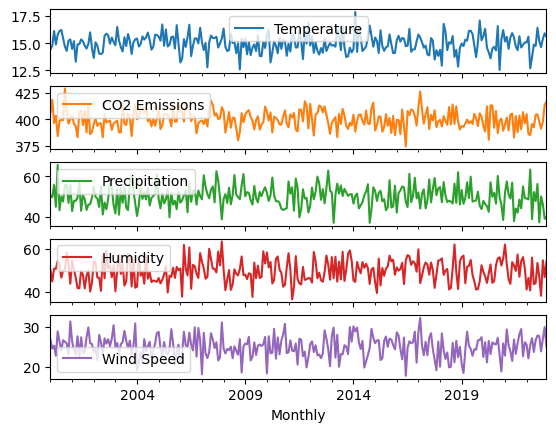

In [ ]:
#Plotting the new monthly average of our selected variables.
dfmonthly2.plot('Monthly', ['Temperature','CO2 Emissions','Precipitation','Humidity','Wind Speed'],subplots=True)

After splitting the data into monthly averages, a little more clarity is available, however, it still doesnt tell us much as it varies quite a bit, again most likely due to world wide variability

In [ ]:
#Computing a rolling 30 day average to see if this is a better baseline
climate_avg=climate_data
climate_avg[['Temperature-monthly-avg', 'CO2 Emissions-monthly-avg','Precipitation-monthly-avg','Humidity-monthly-avg','Wind Speed-monthly-avg']]=climate_avg[['Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity','Wind Speed']].rolling(30).mean()
climate_avg.head()

,Date,Location_x,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Location_y,month,year,Monthly,Temperature-monthly-avg,CO2 Emissions-monthly-avg,Precipitation-monthly-avg,Humidity-monthly-avg,Wind Speed-monthly-avg
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,46,1,2000,2000-01-01,NaN,NaN,NaN,NaN,NaN
1,2001-09-04 10:06:35.319531952,Raymondport,Latvia,21.635289,414.155624,0.029711,60.541813,9.897194,18.714020,46,9,2001,2001-09-01,NaN,NaN,NaN,NaN,NaN
2,2001-11-18 04:31:45.310531048,East Jaimeport,Latvia,11.604753,376.219366,0.418475,33.076905,39.258644,48.506537,46,11,2001,2001-11-01,NaN,NaN,NaN,NaN,NaN
3,2002-05-10 05:54:16.525652560,Katiefort,Latvia,9.417825,317.619973,-1.696188,11.537155,2.909370,42.132354,46,5,2002,2002-05-01,NaN,NaN,NaN,NaN,NaN
4,2002-08-11 11:53:18.199819984,East Steven,Latvia,22.285711,359.899999,-0.677649,41.521742,0.927811,47.042464,46,8,2002,2002-08-01,NaN,NaN,NaN,NaN,NaN


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

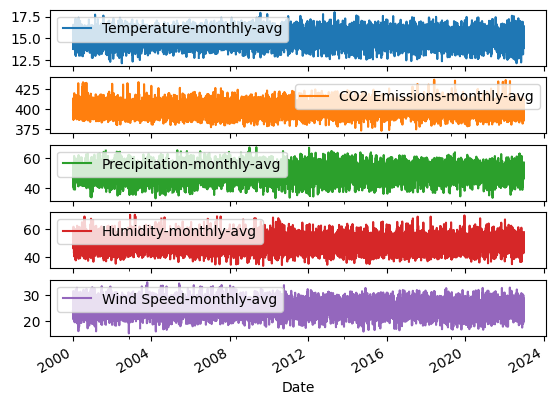

In [ ]:
#build your line chart on the moving average here
climate_avg.plot('Date', ['Temperature-monthly-avg', 'CO2 Emissions-monthly-avg','Precipitation-monthly-avg','Humidity-monthly-avg','Wind Speed-monthly-avg'], subplots = True)


Doing a rolling average is still too congested compared to a monthyl avergae as there is too much data with too much variability to assess

**Observations**:

Scatterplot with data for all countries is too noisy to visualize. A relationship between variables is difficult to determine. Even when doing a tiems-series assessment its too variable to determine a trend. In the next section, we will group by the Country column and take a random sample containing 10% of the countries.

# Sampling

In [ ]:
# Number of countries in the dataset
count = climate_data[['Country']].nunique()
print(count)

Country    236
dtype: int64


In [ ]:
# New dataframe includes 24 countries, random sampled
sample_countries = climate_data['Country'].sample(24).unique()
print(sample_countries)

['United Arab Emirates' 'Serbia' 'Cyprus' 'Austria' 'Cape Verde'
 'Greenland' 'Western Sahara' 'Saudi Arabia' 'Panama'
 'United States Virgin Islands' 'Ethiopia' 'Saint Lucia'
 'Saint Pierre and Miquelon' 'Barbados' 'Tajikistan' 'Turkmenistan'
 'Guinea' 'Vietnam' 'Bosnia and Herzegovina' 'Northern Mariana Islands'
 'Namibia' 'Macao' 'Brazil']


In [ ]:
values_to_include = ['United Arab Emirates', 'Serbia', 'Cyprus', 'Austria', 'Cape Verde',
                     'Greenland', 'Western Sahara', 'Saudi Arabia', 'Panama',
                     'United States Virgin Islands', 'Ethiopia', 'Saint Lucia',
                     'Saint Pierre and Miquelon', 'Barbados', 'Tajikistan', 'Turkmenistan',
                     'Guinea', 'Vietnam', 'Bosnia and Herzegovina', 'Northern Mariana Islands',
                     'Namibia', 'Macao', 'Brazil']

# Filter climate_data based on values_to_include
climate_sampled = climate_data[climate_data['Country'].isin(values_to_include)].copy()
climate_sampled.head(2)

,Date,Location_x,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Location_y,month,year,Monthly,Temperature-monthly-avg,CO2 Emissions-monthly-avg,Precipitation-monthly-avg,Humidity-monthly-avg,Wind Speed-monthly-avg,epoch
78,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,43,1,2000,2000-01-01,13.743433,402.832095,54.853119,47.284360,24.168218,9.469025e+08
79,2000-03-18 06:54:19.765976597,East Angela,Vietnam,11.657608,423.428605,-0.583655,76.015563,90.071914,12.980968,43,3,2000,2000-03-01,13.461359,405.229192,54.123123,48.230933,24.074170,9.533625e+08


# Testing - 24 Countries



*   Long Short Term Memory
*   Decision Tree Regressor
*   Gradient Boosting Regressor
*   Time-Series



In [ ]:
# LTSM Sampled (24 countries)

# Assign x and y, perform train-test split
x = climate_sampled[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Humidity', 'Wind Speed']].values
y = climate_sampled['Precipitation'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Reshape the input data for LSTM
n_steps = 1
n_features = x_train.shape[1]

x_train = x_train.reshape((x_train.shape[0], n_steps, n_features))
x_test = x_test.reshape((x_test.shape[0], n_steps, n_features))

# Train model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Make predictions, calculate metrics
y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 3312.9119
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 3302.1116
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 3290.2083
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 3275.8110
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 3257.0886
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 3231.8865
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 3200.1316
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 3159.1938
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 3107.7681
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 3046.4519
Epoch 11/100
21/21 [==============================] - 0s 2ms/step - loss: 2973.1338
Epoch 12/100
21/21 [==============================] - 0s 2ms/step - loss: 2888.1196
E

In [ ]:
# Re-assign x and y, perform train test split
x = climate_sampled[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Humidity', 'Wind Speed']]
y = climate_sampled['Precipitation']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Sampled (24 countries)
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1737.4456143242874
Root Mean Squared Error (RMSE): 41.682677629013796
Mean Absolute Error (MAE): 34.3957354002802
R-squared (R2) Score: -0.965576698953496


In [ ]:
# Gradient Boosting Sampled (24 countries)
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

y_pred = gb_model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 974.7642113759404
Root Mean Squared Error (RMSE): 31.22121412398852
Mean Absolute Error (MAE): 27.198448611128413
R-squared (R2) Score: -0.10275326321478717


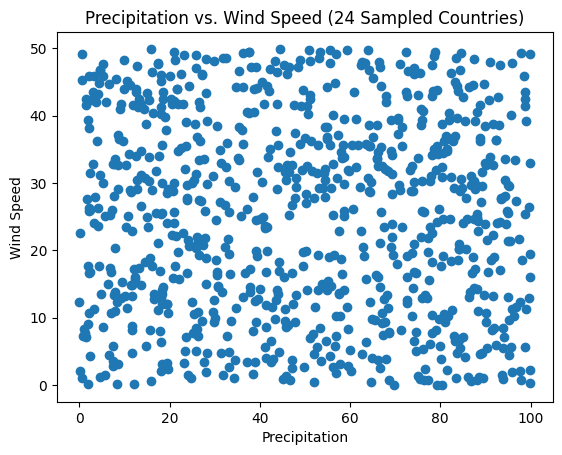

In [ ]:
# Re-test Scatterplot for Precipitation and Wind Speed
plt.scatter(climate_sampled['Precipitation'], climate_sampled['Wind Speed'])
plt.xlabel('Precipitation')
plt.ylabel('Wind Speed')
plt.title('Precipitation vs. Wind Speed (24 Sampled Countries)')
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

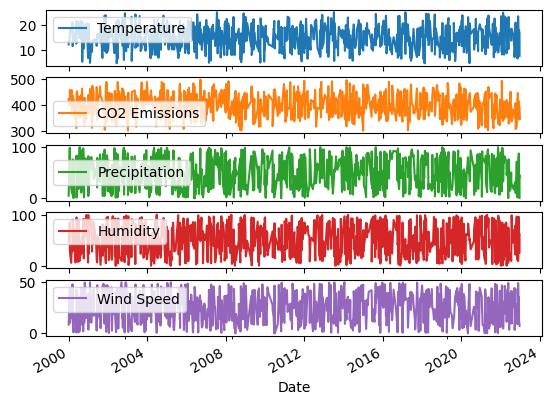

In [ ]:
#Creating initial subplots to assess any trends in the variable data.
climate_sampled.plot('Date',['Temperature','CO2 Emissions','Precipitation','Humidity','Wind Speed'],subplots=True)

Trends for time-series data cleans up overall when fine tuning the country selection., Next we will do monthly averages.

In [ ]:
#Here we will reassess with a monthly average
#making a copy of the datset to play with monthly averages
climate_sampled2=climate_sampled
#Creating a month collumn from the date data
climate_sampled2['month'] = pd.to_datetime(climate_sampled2['Date']).dt.month
#Creating a year collumn from the date data
climate_sampled2['year'] = pd.to_datetime(climate_sampled2['Date']).dt.year
#Setting colsm to be the new year and month collumn
colsm=["year","month"]
#Combining the year and month collumn into a single monthly collumn
climate_sampled2['Monthly'] = climate_sampled2[colsm].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#Changing the dtype to datetime for the new monthly collumn
climate_sampled2['Monthly']= pd.to_datetime(climate_sampled2['Monthly'], format='%Y-%m')
#Calculating a monthly average
climate_sampled3=climate_sampled2.groupby(['Monthly'],as_index=False).mean()
#Testing new dataframe
climate_sampled3.head()

<ipython-input-90-da012256cb0f>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  climate_sampled3=climate_sampled2.groupby(['Monthly'],as_index=False).mean()


,Monthly,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Location_y,month,year,Temperature-monthly-avg,CO2 Emissions-monthly-avg,Precipitation-monthly-avg,Humidity-monthly-avg,Wind Speed-monthly-avg,epoch
0,2000-01-01,14.995664,426.247653,-0.760101,53.635624,53.559924,20.795034,37.666667,1.0,2000.0,14.888837,404.344088,54.842809,45.847566,24.979271,9.481607e+08
1,2000-02-01,18.294760,426.768188,-1.109027,21.849697,6.248381,41.795235,43.000000,2.0,2000.0,12.995726,390.574733,44.285029,59.431351,21.385862,9.509672e+08
2,2000-03-01,17.190153,419.960269,-0.002453,40.695842,49.124431,28.212027,37.250000,3.0,2000.0,15.516620,404.399992,51.361050,48.975868,26.017829,9.528362e+08
3,2000-04-01,14.464681,415.105165,-0.256757,36.565124,61.687500,10.083120,34.500000,4.0,2000.0,14.330204,396.768607,46.928454,50.479848,23.634966,9.553585e+08
4,2000-05-01,17.723045,375.847235,-0.497241,58.173149,44.009117,16.667111,41.750000,5.0,2000.0,14.897023,400.284914,53.721463,51.751880,25.480956,9.590965e+08


array([<Axes: xlabel='Monthly'>, <Axes: xlabel='Monthly'>,
       <Axes: xlabel='Monthly'>, <Axes: xlabel='Monthly'>,
       <Axes: xlabel='Monthly'>], dtype=object)

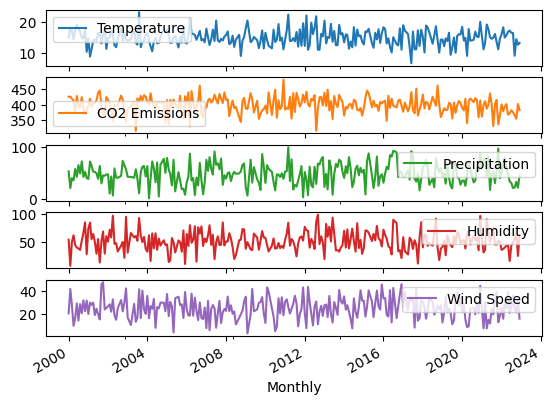

In [ ]:
#Plotting the new monthly average of our selected variables.
climate_sampled3.plot('Monthly', ['Temperature','CO2 Emissions','Precipitation','Humidity','Wind Speed'],subplots=True)

After splitting the data into monthly averages, much more clarity exists and its easier to see a trend with spikes known which is the goal. However, due to the vast change in location still its not as clear as it could be

In [ ]:
#Computing a rolling 30 day average to see if this is a better baseline
climate_sampled_avg=climate_sampled
climate_sampled_avg[['Temperature-monthly-avg', 'CO2 Emissions-monthly-avg','Precipitation-monthly-avg','Humidity-monthly-avg','Wind Speed-monthly-avg']]=climate_sampled_avg[['Temperature', 'CO2 Emissions', 'Precipitation', 'Humidity','Wind Speed']].rolling(30).mean()
climate_sampled_avg.head()

,Date,Location_x,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Location_y,month,year,Monthly,Temperature-monthly-avg,CO2 Emissions-monthly-avg,Precipitation-monthly-avg,Humidity-monthly-avg,Wind Speed-monthly-avg,epoch
78,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,43,1,2000,2000-01-01,NaN,NaN,NaN,NaN,NaN,9.469025e+08
79,2000-03-18 06:54:19.765976597,East Angela,Vietnam,11.657608,423.428605,-0.583655,76.015563,90.071914,12.980968,43,3,2000,2000-03-01,NaN,NaN,NaN,NaN,NaN,9.533625e+08
80,2001-03-17 01:03:30.621062104,East Jeremiah,Vietnam,12.706099,474.723089,-0.618949,73.784060,80.906860,19.565884,43,3,2001,2001-03-01,NaN,NaN,NaN,NaN,NaN,9.847910e+08
81,2001-11-25 17:59:14.635463544,North Kyle,Vietnam,23.638828,475.979570,-0.261510,31.110150,5.401298,34.928899,43,11,2001,2001-11-01,NaN,NaN,NaN,NaN,NaN,1.006711e+09
82,2002-05-11 22:13:43.042304224,Ashleyside,Vietnam,11.037836,455.050510,-0.313350,87.275625,18.834235,30.179062,43,5,2002,2002-05-01,NaN,NaN,NaN,NaN,NaN,1.021155e+09


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

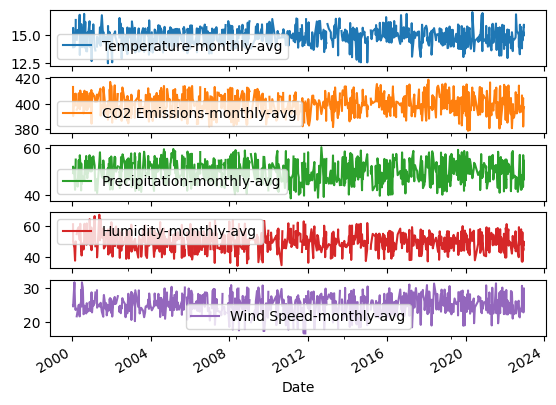

In [ ]:
#build your line chart on the moving average here
climate_sampled_avg.plot('Date', ['Temperature-monthly-avg', 'CO2 Emissions-monthly-avg','Precipitation-monthly-avg','Humidity-monthly-avg','Wind Speed-monthly-avg'], subplots = True)

**Observations:**

The moving average is much cleaner then the straing up time series but not as clean as the monthly average and is still over crowded by the high variability of using multiple contries.

# Testing - Single Country

*   Long Short Term Memory
*   Decision Tree Regressor
*   Gradient Boosting Regressor
*   Time-Series

In [ ]:
# New dataframe includes 24 countries, random sampled
sampled_country = climate_data['Country'].sample(1).unique()
print(sampled_country)

['Norway']


In [ ]:
single_country = climate_data[climate_data['Country'] == 'Norway']

In [ ]:
# LTSM Sampled (1 country)

# Assign x and y, perform train-test split
x = single_country[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Humidity', 'Wind Speed']].values
y = single_country['Precipitation'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Reshape the input data for LSTM
n_steps = 1
n_features = x_train.shape[1]

x_train = x_train.reshape((x_train.shape[0], n_steps, n_features))
x_test = x_test.reshape((x_test.shape[0], n_steps, n_features))

# Train model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Make predictions, calculate metrics
y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3097.7288
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 3097.0852
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 3096.4426
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 3095.8035
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 3095.1660
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 3094.5300
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 3093.8938
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 3093.2578
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 3092.6228
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 3091.9863
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 3091.3496
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 3090.7122
Epoch 13/100
1/1 [==

In [ ]:
# Re-assign x and y, perform train test split
x = single_country[['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'Humidity', 'Wind Speed']]
y = single_country['Precipitation']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Sampled (1 country)
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1921.1338230473123
Root Mean Squared Error (RMSE): 43.83074061714349
Mean Absolute Error (MAE): 33.04607470394623
R-squared (R2) Score: -3.558932526690353


In [ ]:
# Gradient Boosting Sampled (1 country)
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

y_pred = gb_model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 568.3142798486316
Root Mean Squared Error (RMSE): 23.839343108580646
Mean Absolute Error (MAE): 20.036329495670028
R-squared (R2) Score: -0.34863403303931273


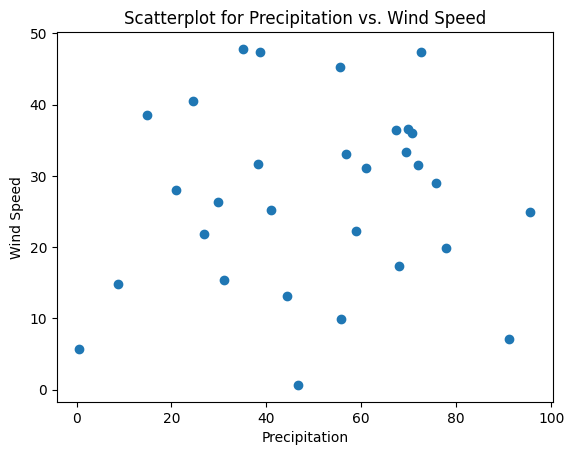

In [ ]:
# Re-test Scatterplot for Precipitation and Wind Speed, Uruguay
plt.scatter(single_country['Precipitation'], single_country['Wind Speed'])
plt.xlabel('Precipitation')
plt.ylabel('Wind Speed')
plt.title('Scatterplot for Precipitation vs. Wind Speed')
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

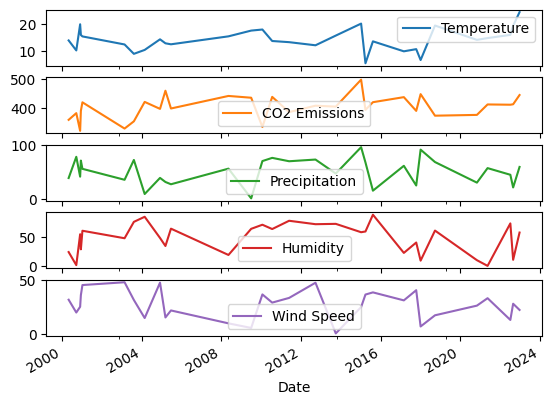

In [ ]:
#Creating initial subplots to assess any trends in the variable data.
single_country.plot('Date',['Temperature','CO2 Emissions','Precipitation','Humidity','Wind Speed'],subplots=True)

When doing a single country the trend is much clearer and you can better see spikes coorelating with other variables. Due to the minimal data per country we will not be doing any average assessments

#Time-Series Linear Regression
We will be trying to predict the following variables using epoch time-series
* Precipitation
* Temperature
* Wind Speed
* Humidity

In [ ]:
#Creating an epoch column
climate_epoch=climate_data
#convert datetime to epoch/unix time
#Set this variable to be "epoch" instead of time due to there already being a collumn for Time in the cleaned data.
climate_epoch['epoch'] = (climate_epoch['Date']- dt.datetime(1970,1,1)).dt.total_seconds()

In [ ]:
ts = pd.DataFrame(climate_epoch.epoch)
ys = pd.DataFrame(climate_epoch.Precipitation)
ph = 5*60 #5 minutes
mu = 0.9 #Set to 0.9, 1, and 0.01 depending on problem
#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000
# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0]+ph
    yp = m_tmp*tp + q_tmp
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

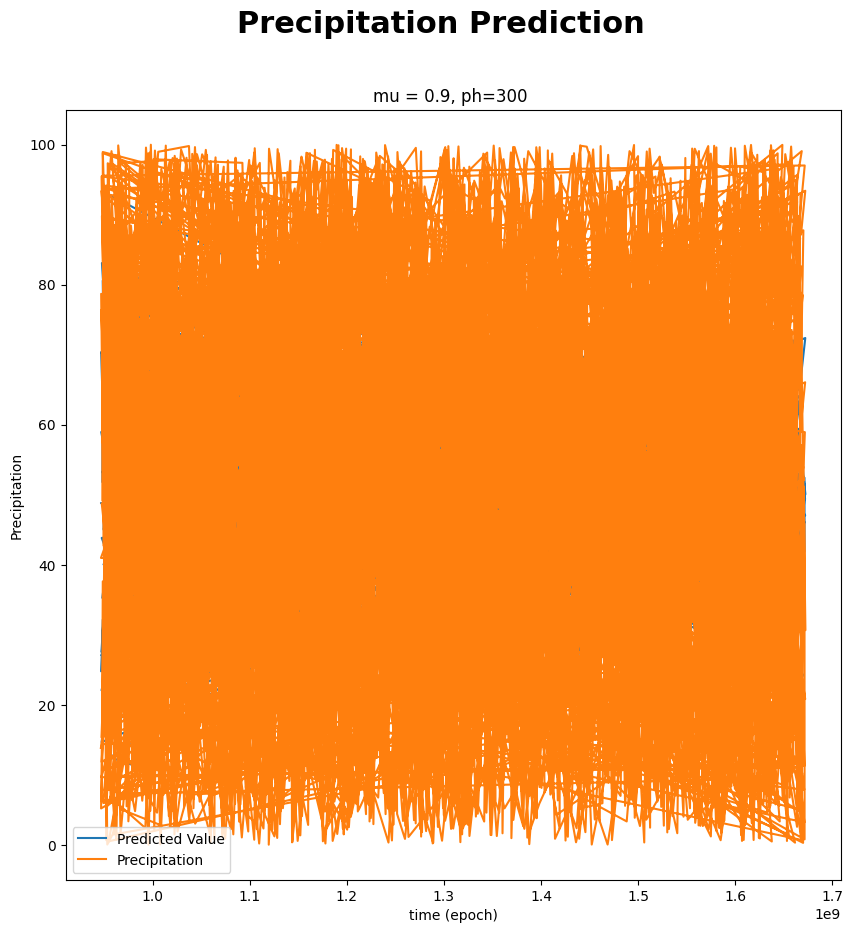

In [ ]:
#Setting New dataframefor epch predicitoin data for precipitation
epoch_pred=pd.DataFrame()
epoch_pred['Time in Epoch']=ts.iloc[0:4999,0]
epoch_pred['Precipitation']=ys.iloc[0:4999,0]
epoch_pred['Predicted Time in Epoch']=tp_pred
epoch_pred['Predicted Precip']=yp_pred
#Graphing results
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Precipitation Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Precipitation')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Precipitation')
ax.legend()

In [ ]:
mse = mean_squared_error(ys[1:5000], yp_pred)
print("MSE is", mse)


MSE is 623.4760875801477


After assessing the variable with all data we can see there is too much variation from location to location to do this accurately, we will try to fine tune with less data by only showing the first 200 points

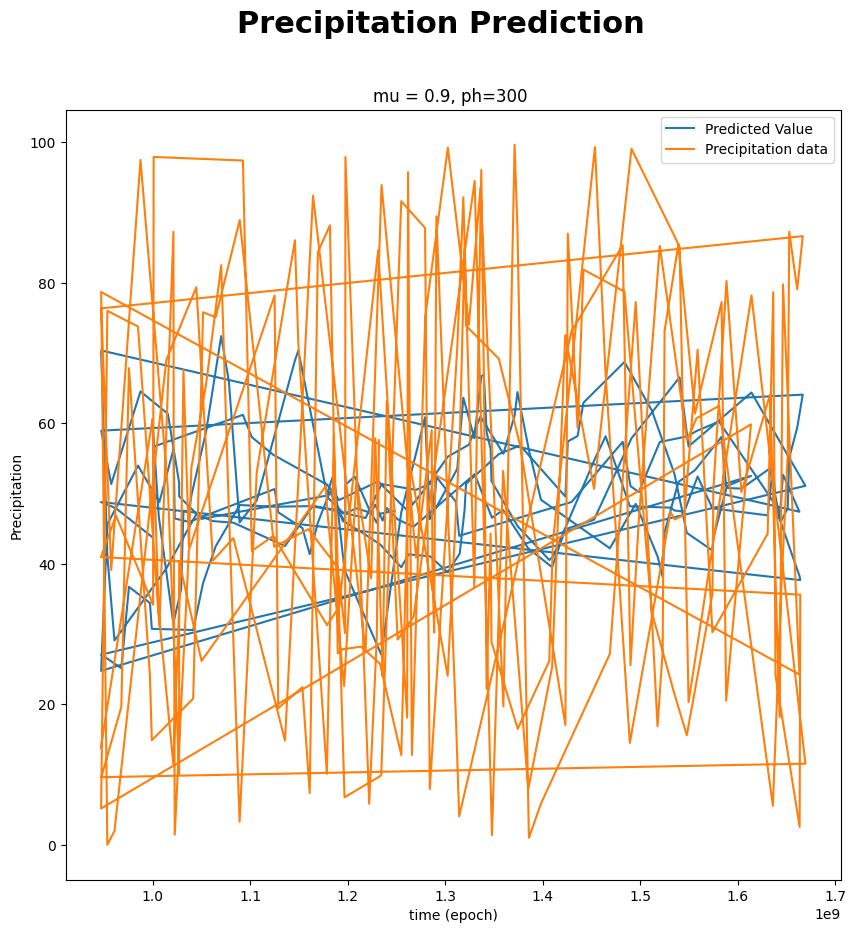

In [ ]:
#Plot first 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Precipitation Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[:200,0], ys.iloc[:200,0], label='Precipitation data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Precipitation')
ax.legend()

Still too much variability in the data and can assume this will continue for all variables. Ass seen previously using a portion of the countries still consists of too much variability, so we will go straight to the single country assessment.

In [ ]:
#Creating an epoch column for single country data
single_climate_epoch=single_country
#resetting index
single_climate_epoch=single_climate_epoch.reset_index()
#Removing added index collumn
del single_climate_epoch['index']
#convert datetime to epoch/unix time
#Set this variable to be "epoch" instead of time due to there already being a collumn for Time in the cleaned data.
single_climate_epoch['epoch'] = (single_climate_epoch['Date']- dt.datetime(1970,1,1)).dt.total_seconds()

In [ ]:
#Checking data size
single_country.shape

(30, 19)

In [ ]:
ts = pd.DataFrame(single_climate_epoch.epoch)
ys = pd.DataFrame(single_climate_epoch.Precipitation)
ph = 5*60 #5 minutes
mu = 0.9
n_s = len(single_climate_epoch)
# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0]+ph
    yp = m_tmp*tp + q_tmp
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

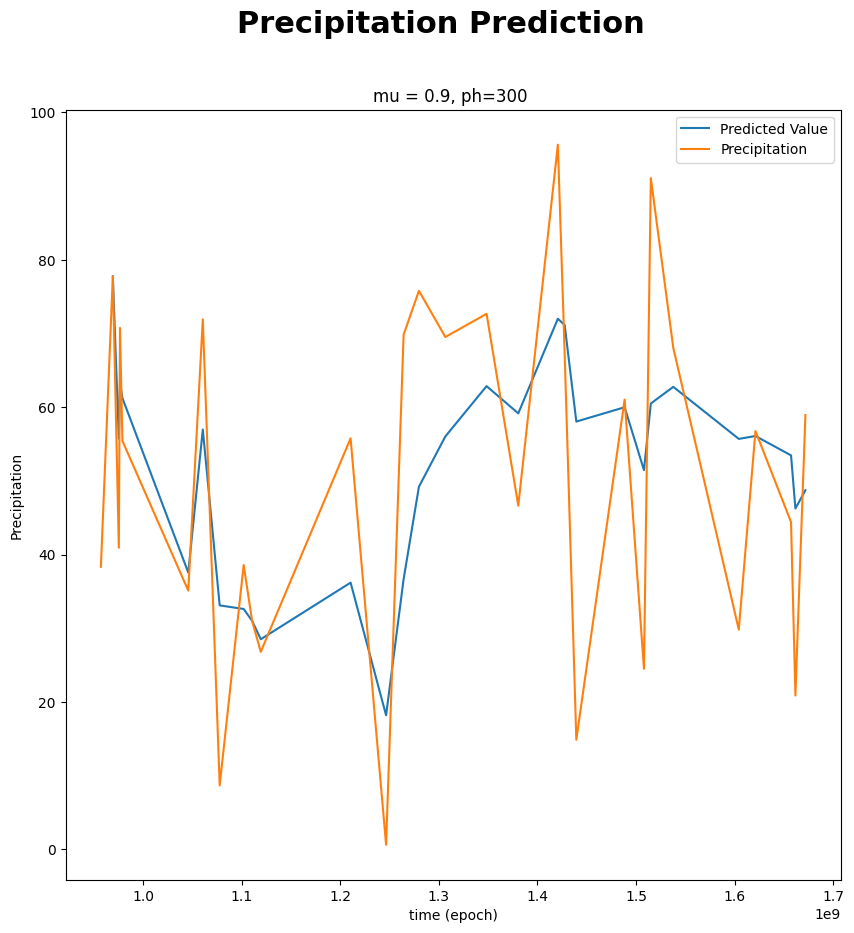

In [ ]:
#Setting New dataframefor epch predicitoin data for precipitation
epoch_pred=pd.DataFrame()
epoch_pred['Time in Epoch']=ts.iloc[0:n_s-1,0]
epoch_pred['Precipitation']=ys.iloc[0:n_s-1,0]
epoch_pred['Predicted Time in Epoch']=tp_pred
epoch_pred['Predicted Precip']=yp_pred
#Graphing results
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Precipitation Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Precipitation')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Precipitation')
ax.legend()

In [ ]:
mse_value = mean_squared_error(ys[1:5000], yp_pred)
print("MSE is", mse_value)


MSE is 335.74855212686504


The prediction was able to do close on the trend just wasnt able to predict the spikes which is due to minial data available for assessment.

In [ ]:
ts = pd.DataFrame(single_climate_epoch.epoch)
ys = pd.DataFrame(single_climate_epoch.Temperature)
ph = 5*60 #5 minutes
mu = 0.9 #Set to 0.9, 1, and 0.01 depending on problem
#let's limit the number of samples in our model to the data size
n_s = len(single_climate_epoch)
# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0]+ph
    yp = m_tmp*tp + q_tmp
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

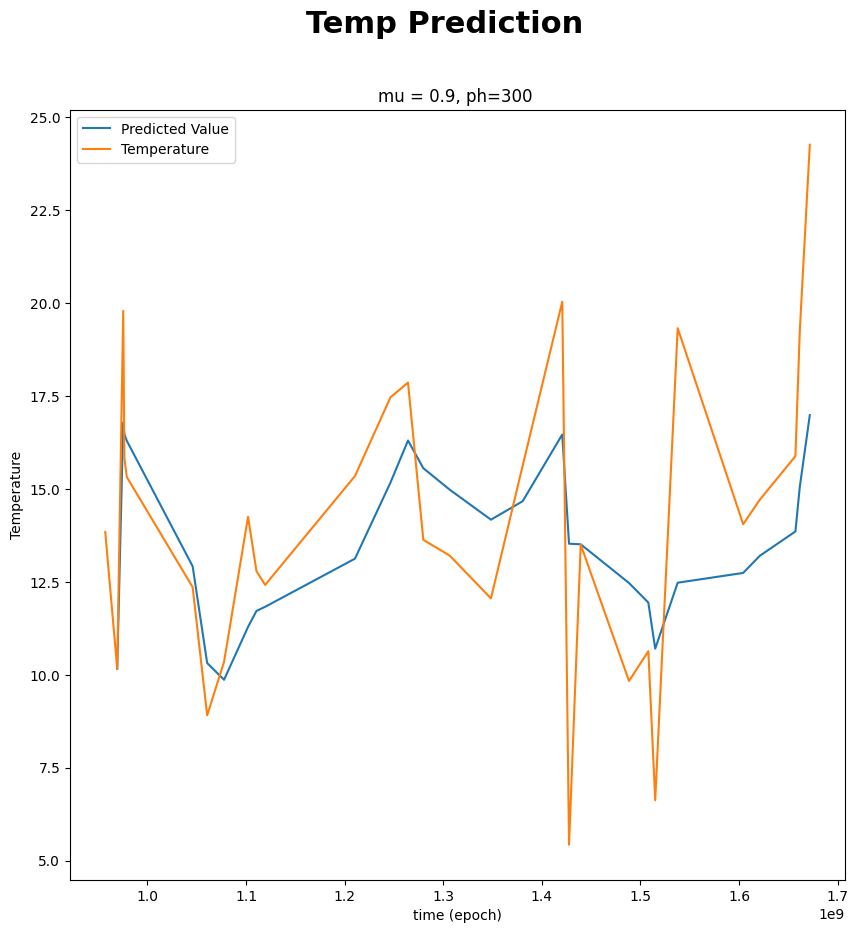

In [ ]:
#Setting New dataframefor each predicitoin data for temperature
epoch_pred=pd.DataFrame()
epoch_pred['Time in Epoch']=ts.iloc[0:n_s-1,0]
epoch_pred['Temperature']=ys.iloc[0:n_s-1,0]
epoch_pred['Predicted Time in Epoch']=tp_pred
epoch_pred['Predicted Temp']=yp_pred
#Graphing results
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temp Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Temperature')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Temperature')
ax.legend()

In [ ]:
min_len = min(len(ys), len(yp_pred))
ys = ys[:min_len]
yp_pred = yp_pred[:min_len]

mse_value = mean_squared_error(ys, yp_pred)
print("MSE is", mse_value)

MSE is 10.447550836576205


In [ ]:
ts = pd.DataFrame(single_climate_epoch.epoch)
ys = pd.DataFrame(single_climate_epoch['Wind Speed'])
ph = 5*60 #5 minutes
mu = 0.9 #Set to 0.9, 1, and 0.01 depending on problem
#let's limit the number of samples in our model to the data size
n_s = len(single_climate_epoch)
# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0]+ph
    yp = m_tmp*tp + q_tmp
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

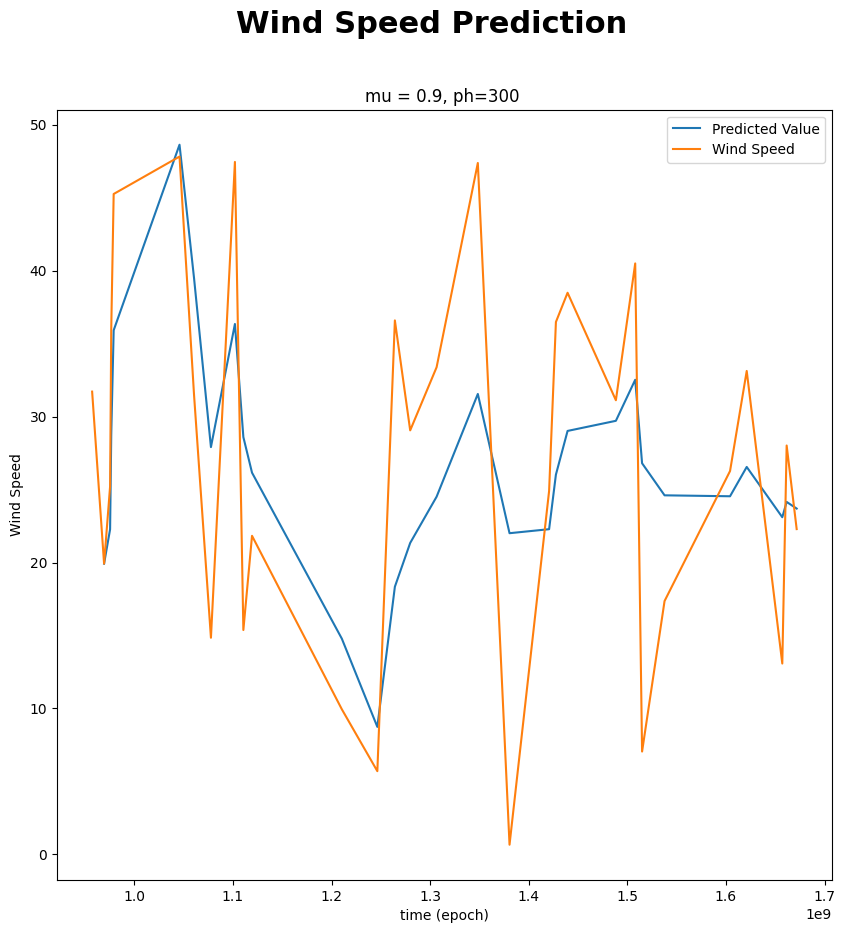

In [ ]:
#Setting New dataframefor each predicitoin data for temperature
epoch_pred=pd.DataFrame()
epoch_pred['Time in Epoch']=ts.iloc[0:n_s-1,0]
epoch_pred['Wind Speed']=ys.iloc[0:n_s-1,0]
epoch_pred['Predicted Time in Epoch']=tp_pred
epoch_pred['Predicted WS']=yp_pred
#Graphing results
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Wind Speed Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Wind Speed')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Wind Speed')
ax.legend()

In [ ]:
if len(ys) != len(yp_pred):
    min_len = min(len(ys), len(yp_pred))
    ys = ys[:min_len]
    yp_pred = yp_pred[:min_len]

mse_value = mean_squared_error(ys, yp_pred)
print("MSE is", mse_value)

MSE is 127.14129480253595


In [ ]:
ts = pd.DataFrame(single_climate_epoch.epoch)
ys = pd.DataFrame(single_climate_epoch['Humidity'])
ph = 5*60 #5 minutes
mu = 0.9 #Set to 0.9, 1, and 0.01 depending on problem
#let's limit the number of samples in our model to the data size
n_s = len(single_climate_epoch)
# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0]+ph
    yp = m_tmp*tp + q_tmp
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

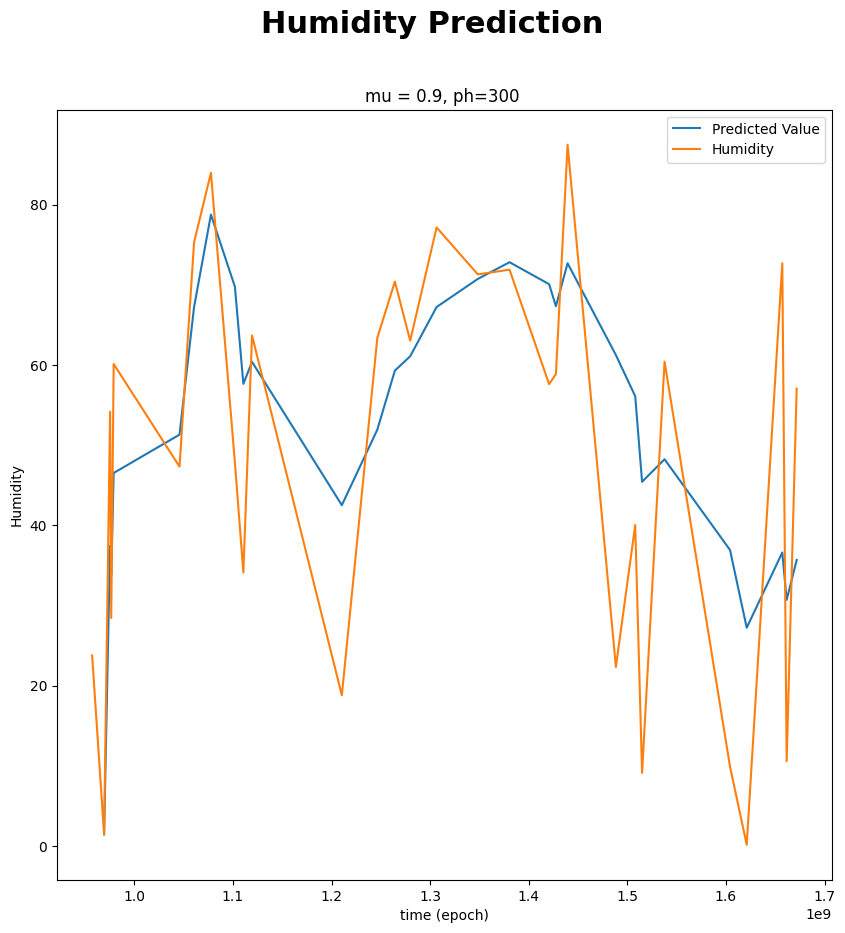

In [ ]:
#Setting New dataframefor each predicitoin data for temperature
epoch_pred=pd.DataFrame()
epoch_pred['Time in Epoch']=ts.iloc[0:n_s-1,0]
epoch_pred['Humidity']=ys.iloc[0:n_s-1,0]
epoch_pred['Predicted Time in Epoch']=tp_pred
epoch_pred['Predicted Humidity']=yp_pred
#Graphing results
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Humidity Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Humidity')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Humidity')
ax.legend()

In [ ]:
if len(ys) != len(yp_pred):
    min_len = min(len(ys), len(yp_pred))
    ys = ys[:min_len]
    yp_pred = yp_pred[:min_len]

mse_value = mean_squared_error(ys, yp_pred)
print("MSE is", mse_value)

MSE is 482.0747389482093


The predicitons were able to be followed with all variables with equal comparison to the results for precipitation, but also require more data to increase accuracy. Temperature has the best predictable variable out of the 4 assessed.

In [ ]:
len(single_climate_epoch)

30

In [ ]:
#create your training and validation sets here

#assign size for data subset
sub=0.01

#take random data subset
climate_data4=climate_data

#split data subset 80/20 for train/validation
train_ind = int(len(climate_data4)*0.8)
train_df = climate_data4[:train_ind]
val_df = climate_data4[train_ind:]
#reset the indices for cleanliness
train_df = train_df.reset_index()
val_df = val_df.reset_index()
#After checking the split, the items were shuffled, so this willl put them back in the correct order.
train_df=train_df.sort_values(by="Date")
val_df=val_df.sort_values(by="Date")

In [ ]:
seq_arrays = []
seq_labs = []
# we'll start out with a 20 minute input sequence and a one minute predictive horizon
seq_length = 20
ph = 1
feat_cols = ['Temperature']
#create list of sequence length temperature readings
for start in range(0, len(train_df)-seq_length-ph):
    seq_arrays.append(train_df[feat_cols].iloc[start:start+seq_length].to_numpy())
    seq_labs.append(train_df[feat_cols].iloc[start:start+seq_length].to_numpy()[-ph])
#convert to numpy arrays and floats to appease keras/tensorflow
seq_arrays = np.array(seq_arrays, dtype = object).astype(np.float32)
seq_labs = np.array(seq_labs, dtype = object).astype(np.float32)

In [ ]:
assert(seq_arrays.shape == (len(train_df)-seq_length-ph,seq_length, len(feat_cols)))
assert(seq_labs.shape == (len(train_df)-seq_length-ph,ph))

In [ ]:
# define path to save model
model_path = 'temp_LTSM_pred'
# build the network
nb_features = seq_arrays.shape[2]
nb_out = seq_labs.shape[1]
model = Sequential()
#add first LSTM layer
model.add(LSTM(
         input_shape=(seq_length, nb_features),
         units=5,
         return_sequences=True))
model.add(Dropout(0.2))
# add second LSTM layer
model.add(LSTM(
          units=3,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out))
model.add(Activation('sigmoid'))
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
print(model.summary())
# fit the network
history = model.fit(seq_arrays, seq_labs, epochs=100, batch_size=500, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
# list all data in history
print(history.history.keys())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20, 5)             140       
                                                                 
 dropout_4 (Dropout)         (None, 20, 5)             0         
                                                                 
 lstm_10 (LSTM)              (None, 3)                 108       
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 252
Trainable params: 252
Non-trainable 

13/13 - 21s - loss: 229.0753 - mse: 229.0753 - val_loss: 229.6931 - val_mse: 229.6931 - 21s/epoch - 2s/step
Epoch 2/100


13/13 - 12s - loss: 222.7474 - mse: 222.7474 - val_loss: 224.2967 - val_mse: 224.2967 - 12s/epoch - 956ms/step
Epoch 3/100


13/13 - 7s - loss: 219.5743 - mse: 219.5743 - val_loss: 222.2720 - val_mse: 222.2720 - 7s/epoch - 559ms/step
Epoch 4/100


13/13 - 8s - loss: 218.3074 - mse: 218.3074 - val_loss: 221.5609 - val_mse: 221.5609 - 8s/epoch - 647ms/step
Epoch 5/100


13/13 - 7s - loss: 217.8254 - mse: 217.8254 - val_loss: 221.2506 - val_mse: 221.2506 - 7s/epoch - 551ms/step
Epoch 6/100


13/13 - 9s - loss: 217.5514 - mse: 217.5514 - val_loss: 221.0792 - val_mse: 221.0792 - 9s/epoch - 658ms/step
Epoch 7/100


13/13 - 7s - loss: 217.3421 - mse: 217.3421 - val_loss: 220.9701 - val_mse: 220.9701 - 7s/epoch - 516ms/step
Epoch 8/100


13/13 - 7s - loss: 217.2299 - mse: 217.2299 - val_loss: 220.8947 - val_mse: 220.8947 - 7s/epoch - 559ms/step
Epoch 9/100


13/13 - 8s - loss: 217.1323 - mse: 217.1323 - val_loss: 220.8390 - val_mse: 220.8390 - 8s/epoch - 631ms/step
Epoch 10/100


13/13 - 7s - loss: 217.0923 - mse: 217.0923 - val_loss: 220.7961 - val_mse: 220.7961 - 7s/epoch - 562ms/step
Epoch 11/100


13/13 - 9s - loss: 216.9674 - mse: 216.9674 - val_loss: 220.7623 - val_mse: 220.7623 - 9s/epoch - 671ms/step
Epoch 12/100


13/13 - 7s - loss: 216.9524 - mse: 216.9524 - val_loss: 220.7352 - val_mse: 220.7352 - 7s/epoch - 539ms/step
Epoch 13/100


13/13 - 7s - loss: 216.8911 - mse: 216.8911 - val_loss: 220.7124 - val_mse: 220.7124 - 7s/epoch - 556ms/step
Epoch 14/100


13/13 - 10s - loss: 216.8837 - mse: 216.8837 - val_loss: 220.6933 - val_mse: 220.6933 - 10s/epoch - 794ms/step
Epoch 15/100


13/13 - 7s - loss: 216.8188 - mse: 216.8188 - val_loss: 220.6769 - val_mse: 220.6769 - 7s/epoch - 509ms/step
Epoch 16/100


13/13 - 8s - loss: 216.8127 - mse: 216.8127 - val_loss: 220.6620 - val_mse: 220.6620 - 8s/epoch - 647ms/step
Epoch 17/100


13/13 - 7s - loss: 216.7636 - mse: 216.7636 - val_loss: 220.6490 - val_mse: 220.6490 - 7s/epoch - 514ms/step
Epoch 18/100


13/13 - 8s - loss: 216.7635 - mse: 216.7635 - val_loss: 220.6394 - val_mse: 220.6394 - 8s/epoch - 652ms/step
Epoch 19/100


13/13 - 8s - loss: 216.7413 - mse: 216.7413 - val_loss: 220.6317 - val_mse: 220.6317 - 8s/epoch - 580ms/step
Epoch 20/100


13/13 - 7s - loss: 216.7222 - mse: 216.7222 - val_loss: 220.6251 - val_mse: 220.6251 - 7s/epoch - 525ms/step
Epoch 21/100


13/13 - 9s - loss: 216.6951 - mse: 216.6951 - val_loss: 220.6192 - val_mse: 220.6192 - 9s/epoch - 677ms/step
Epoch 22/100


13/13 - 7s - loss: 216.6957 - mse: 216.6957 - val_loss: 220.6141 - val_mse: 220.6141 - 7s/epoch - 516ms/step
Epoch 23/100


13/13 - 9s - loss: 216.6844 - mse: 216.6844 - val_loss: 220.6095 - val_mse: 220.6095 - 9s/epoch - 663ms/step
Epoch 24/100


13/13 - 7s - loss: 216.6857 - mse: 216.6857 - val_loss: 220.6053 - val_mse: 220.6053 - 7s/epoch - 570ms/step
Epoch 25/100


13/13 - 7s - loss: 216.6503 - mse: 216.6503 - val_loss: 220.6017 - val_mse: 220.6017 - 7s/epoch - 518ms/step
Epoch 26/100


13/13 - 9s - loss: 216.6228 - mse: 216.6228 - val_loss: 220.5985 - val_mse: 220.5985 - 9s/epoch - 692ms/step
Epoch 27/100


13/13 - 7s - loss: 216.6230 - mse: 216.6230 - val_loss: 220.5956 - val_mse: 220.5956 - 7s/epoch - 573ms/step
Epoch 28/100


13/13 - 7s - loss: 216.6335 - mse: 216.6335 - val_loss: 220.5930 - val_mse: 220.5930 - 7s/epoch - 549ms/step
Epoch 29/100


13/13 - 9s - loss: 216.6322 - mse: 216.6322 - val_loss: 220.5905 - val_mse: 220.5905 - 9s/epoch - 675ms/step
Epoch 30/100


13/13 - 7s - loss: 216.6075 - mse: 216.6075 - val_loss: 220.5883 - val_mse: 220.5883 - 7s/epoch - 525ms/step
Epoch 31/100


13/13 - 9s - loss: 216.6106 - mse: 216.6106 - val_loss: 220.5862 - val_mse: 220.5862 - 9s/epoch - 656ms/step
Epoch 32/100


13/13 - 7s - loss: 216.6002 - mse: 216.6002 - val_loss: 220.5843 - val_mse: 220.5843 - 7s/epoch - 575ms/step
Epoch 33/100


13/13 - 8s - loss: 216.6031 - mse: 216.6031 - val_loss: 220.5826 - val_mse: 220.5826 - 8s/epoch - 641ms/step
Epoch 34/100


13/13 - 8s - loss: 216.5946 - mse: 216.5946 - val_loss: 220.5810 - val_mse: 220.5810 - 8s/epoch - 579ms/step
Epoch 35/100


13/13 - 7s - loss: 216.5879 - mse: 216.5879 - val_loss: 220.5796 - val_mse: 220.5796 - 7s/epoch - 517ms/step
Epoch 36/100


13/13 - 9s - loss: 216.5571 - mse: 216.5571 - val_loss: 220.5782 - val_mse: 220.5782 - 9s/epoch - 687ms/step
Epoch 37/100


13/13 - 7s - loss: 216.5771 - mse: 216.5771 - val_loss: 220.5770 - val_mse: 220.5770 - 7s/epoch - 575ms/step
Epoch 38/100


13/13 - 8s - loss: 216.5579 - mse: 216.5579 - val_loss: 220.5759 - val_mse: 220.5759 - 8s/epoch - 623ms/step
Epoch 39/100


13/13 - 7s - loss: 216.5647 - mse: 216.5647 - val_loss: 220.5749 - val_mse: 220.5749 - 7s/epoch - 562ms/step
Epoch 40/100


13/13 - 7s - loss: 216.5508 - mse: 216.5508 - val_loss: 220.5738 - val_mse: 220.5738 - 7s/epoch - 521ms/step
Epoch 41/100


13/13 - 9s - loss: 216.5394 - mse: 216.5394 - val_loss: 220.5729 - val_mse: 220.5729 - 9s/epoch - 690ms/step
Epoch 42/100


13/13 - 7s - loss: 216.5702 - mse: 216.5702 - val_loss: 220.5721 - val_mse: 220.5721 - 7s/epoch - 575ms/step
Epoch 43/100


13/13 - 7s - loss: 216.5477 - mse: 216.5477 - val_loss: 220.5713 - val_mse: 220.5713 - 7s/epoch - 521ms/step
Epoch 44/100


13/13 - 9s - loss: 216.5382 - mse: 216.5382 - val_loss: 220.5705 - val_mse: 220.5705 - 9s/epoch - 677ms/step
Epoch 45/100


13/13 - 7s - loss: 216.5357 - mse: 216.5357 - val_loss: 220.5698 - val_mse: 220.5698 - 7s/epoch - 569ms/step
Epoch 46/100


13/13 - 8s - loss: 216.5395 - mse: 216.5395 - val_loss: 220.5692 - val_mse: 220.5692 - 8s/epoch - 621ms/step
Epoch 47/100


13/13 - 7s - loss: 216.5211 - mse: 216.5211 - val_loss: 220.5686 - val_mse: 220.5686 - 7s/epoch - 564ms/step
Epoch 48/100


13/13 - 8s - loss: 216.5389 - mse: 216.5389 - val_loss: 220.5680 - val_mse: 220.5680 - 8s/epoch - 617ms/step
Epoch 49/100


13/13 - 7s - loss: 216.5352 - mse: 216.5352 - val_loss: 220.5674 - val_mse: 220.5674 - 7s/epoch - 565ms/step
Epoch 50/100


13/13 - 7s - loss: 216.5180 - mse: 216.5180 - val_loss: 220.5669 - val_mse: 220.5669 - 7s/epoch - 561ms/step
Epoch 51/100


13/13 - 8s - loss: 216.5242 - mse: 216.5242 - val_loss: 220.5664 - val_mse: 220.5664 - 8s/epoch - 650ms/step
Epoch 52/100


13/13 - 7s - loss: 216.5146 - mse: 216.5146 - val_loss: 220.5660 - val_mse: 220.5660 - 7s/epoch - 565ms/step
Epoch 53/100


13/13 - 7s - loss: 216.5151 - mse: 216.5151 - val_loss: 220.5655 - val_mse: 220.5655 - 7s/epoch - 520ms/step
Epoch 54/100


13/13 - 9s - loss: 216.5142 - mse: 216.5142 - val_loss: 220.5651 - val_mse: 220.5651 - 9s/epoch - 670ms/step
Epoch 55/100


13/13 - 7s - loss: 216.5069 - mse: 216.5069 - val_loss: 220.5647 - val_mse: 220.5647 - 7s/epoch - 576ms/step
Epoch 56/100


13/13 - 8s - loss: 216.5129 - mse: 216.5129 - val_loss: 220.5644 - val_mse: 220.5644 - 8s/epoch - 620ms/step
Epoch 57/100


13/13 - 7s - loss: 216.5116 - mse: 216.5116 - val_loss: 220.5640 - val_mse: 220.5640 - 7s/epoch - 570ms/step
Epoch 58/100


13/13 - 7s - loss: 216.5154 - mse: 216.5154 - val_loss: 220.5637 - val_mse: 220.5637 - 7s/epoch - 511ms/step
Epoch 59/100


13/13 - 9s - loss: 216.5078 - mse: 216.5078 - val_loss: 220.5634 - val_mse: 220.5634 - 9s/epoch - 673ms/step
Epoch 60/100


13/13 - 7s - loss: 216.5026 - mse: 216.5026 - val_loss: 220.5631 - val_mse: 220.5631 - 7s/epoch - 563ms/step
Epoch 61/100


13/13 - 8s - loss: 216.4986 - mse: 216.4986 - val_loss: 220.5628 - val_mse: 220.5628 - 8s/epoch - 608ms/step
Epoch 62/100


13/13 - 7s - loss: 216.5001 - mse: 216.5001 - val_loss: 220.5625 - val_mse: 220.5625 - 7s/epoch - 566ms/step
Epoch 63/100


13/13 - 9s - loss: 216.4992 - mse: 216.4992 - val_loss: 220.5623 - val_mse: 220.5623 - 9s/epoch - 660ms/step
Epoch 64/100


13/13 - 7s - loss: 216.4872 - mse: 216.4872 - val_loss: 220.5620 - val_mse: 220.5620 - 7s/epoch - 551ms/step
Epoch 65/100


13/13 - 8s - loss: 216.5000 - mse: 216.5000 - val_loss: 220.5618 - val_mse: 220.5618 - 8s/epoch - 582ms/step
Epoch 66/100


13/13 - 9s - loss: 216.4875 - mse: 216.4875 - val_loss: 220.5616 - val_mse: 220.5616 - 9s/epoch - 683ms/step
Epoch 67/100


13/13 - 7s - loss: 216.4961 - mse: 216.4961 - val_loss: 220.5614 - val_mse: 220.5614 - 7s/epoch - 558ms/step
Epoch 68/100


13/13 - 9s - loss: 216.4880 - mse: 216.4880 - val_loss: 220.5612 - val_mse: 220.5612 - 9s/epoch - 675ms/step
Epoch 69/100


13/13 - 7s - loss: 216.4930 - mse: 216.4930 - val_loss: 220.5610 - val_mse: 220.5610 - 7s/epoch - 524ms/step
Epoch 70/100


13/13 - 7s - loss: 216.4913 - mse: 216.4913 - val_loss: 220.5608 - val_mse: 220.5608 - 7s/epoch - 572ms/step
Epoch 71/100


13/13 - 9s - loss: 216.4879 - mse: 216.4879 - val_loss: 220.5606 - val_mse: 220.5606 - 9s/epoch - 718ms/step
Epoch 72/100


13/13 - 7s - loss: 216.4921 - mse: 216.4921 - val_loss: 220.5604 - val_mse: 220.5604 - 7s/epoch - 568ms/step
Epoch 73/100


13/13 - 9s - loss: 216.4751 - mse: 216.4751 - val_loss: 220.5603 - val_mse: 220.5603 - 9s/epoch - 675ms/step
Epoch 74/100


13/13 - 7s - loss: 216.4911 - mse: 216.4911 - val_loss: 220.5602 - val_mse: 220.5602 - 7s/epoch - 544ms/step
Epoch 75/100


13/13 - 7s - loss: 216.4807 - mse: 216.4807 - val_loss: 220.5600 - val_mse: 220.5600 - 7s/epoch - 564ms/step
Epoch 76/100


13/13 - 9s - loss: 216.4771 - mse: 216.4771 - val_loss: 220.5598 - val_mse: 220.5598 - 9s/epoch - 693ms/step
Epoch 77/100


13/13 - 7s - loss: 216.4892 - mse: 216.4892 - val_loss: 220.5597 - val_mse: 220.5597 - 7s/epoch - 528ms/step
Epoch 78/100


13/13 - 7s - loss: 216.4745 - mse: 216.4745 - val_loss: 220.5596 - val_mse: 220.5596 - 7s/epoch - 563ms/step
Epoch 79/100


13/13 - 9s - loss: 216.4700 - mse: 216.4700 - val_loss: 220.5594 - val_mse: 220.5594 - 9s/epoch - 674ms/step
Epoch 80/100


13/13 - 7s - loss: 216.4715 - mse: 216.4715 - val_loss: 220.5593 - val_mse: 220.5593 - 7s/epoch - 527ms/step
Epoch 81/100


13/13 - 8s - loss: 216.4790 - mse: 216.4790 - val_loss: 220.5592 - val_mse: 220.5592 - 8s/epoch - 650ms/step
Epoch 82/100


13/13 - 7s - loss: 216.4795 - mse: 216.4795 - val_loss: 220.5591 - val_mse: 220.5591 - 7s/epoch - 518ms/step
Epoch 83/100


13/13 - 9s - loss: 216.4860 - mse: 216.4860 - val_loss: 220.5590 - val_mse: 220.5590 - 9s/epoch - 662ms/step
Epoch 84/100


13/13 - 8s - loss: 216.4767 - mse: 216.4767 - val_loss: 220.5589 - val_mse: 220.5589 - 8s/epoch - 608ms/step
Epoch 85/100


13/13 - 7s - loss: 216.4639 - mse: 216.4639 - val_loss: 220.5588 - val_mse: 220.5588 - 7s/epoch - 518ms/step
Epoch 86/100


13/13 - 9s - loss: 216.4697 - mse: 216.4697 - val_loss: 220.5587 - val_mse: 220.5587 - 9s/epoch - 679ms/step
Epoch 87/100


13/13 - 7s - loss: 216.4641 - mse: 216.4641 - val_loss: 220.5586 - val_mse: 220.5586 - 7s/epoch - 534ms/step
Epoch 88/100


13/13 - 8s - loss: 216.4738 - mse: 216.4738 - val_loss: 220.5585 - val_mse: 220.5585 - 8s/epoch - 598ms/step
Epoch 89/100


13/13 - 9s - loss: 216.4676 - mse: 216.4676 - val_loss: 220.5584 - val_mse: 220.5584 - 9s/epoch - 668ms/step
Epoch 90/100


13/13 - 7s - loss: 216.4597 - mse: 216.4597 - val_loss: 220.5583 - val_mse: 220.5583 - 7s/epoch - 511ms/step
Epoch 91/100


13/13 - 8s - loss: 216.4656 - mse: 216.4656 - val_loss: 220.5582 - val_mse: 220.5582 - 8s/epoch - 630ms/step
Epoch 92/100


13/13 - 7s - loss: 216.4686 - mse: 216.4686 - val_loss: 220.5582 - val_mse: 220.5582 - 7s/epoch - 533ms/step
Epoch 93/100


13/13 - 8s - loss: 216.4609 - mse: 216.4609 - val_loss: 220.5581 - val_mse: 220.5581 - 8s/epoch - 638ms/step
Epoch 94/100


13/13 - 7s - loss: 216.4697 - mse: 216.4697 - val_loss: 220.5580 - val_mse: 220.5580 - 7s/epoch - 559ms/step
Epoch 95/100


13/13 - 7s - loss: 216.4654 - mse: 216.4654 - val_loss: 220.5580 - val_mse: 220.5580 - 7s/epoch - 507ms/step
Epoch 96/100


13/13 - 9s - loss: 216.4626 - mse: 216.4626 - val_loss: 220.5579 - val_mse: 220.5579 - 9s/epoch - 657ms/step
Epoch 97/100


13/13 - 7s - loss: 216.4690 - mse: 216.4690 - val_loss: 220.5578 - val_mse: 220.5578 - 7s/epoch - 527ms/step
Epoch 98/100


13/13 - 8s - loss: 216.4574 - mse: 216.4574 - val_loss: 220.5578 - val_mse: 220.5578 - 8s/epoch - 644ms/step
Epoch 99/100


13/13 - 7s - loss: 216.4616 - mse: 216.4616 - val_loss: 220.5577 - val_mse: 220.5577 - 7s/epoch - 568ms/step
Epoch 100/100


13/13 - 7s - loss: 216.4589 - mse: 216.4589 - val_loss: 220.5576 - val_mse: 220.5576 - 7s/epoch - 510ms/step
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


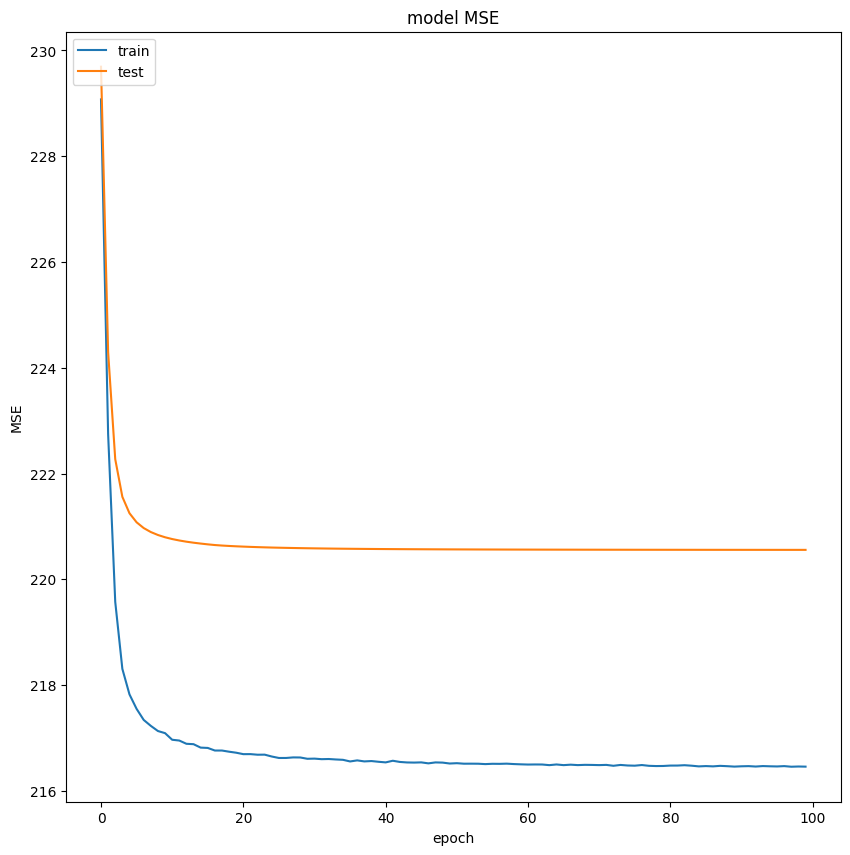

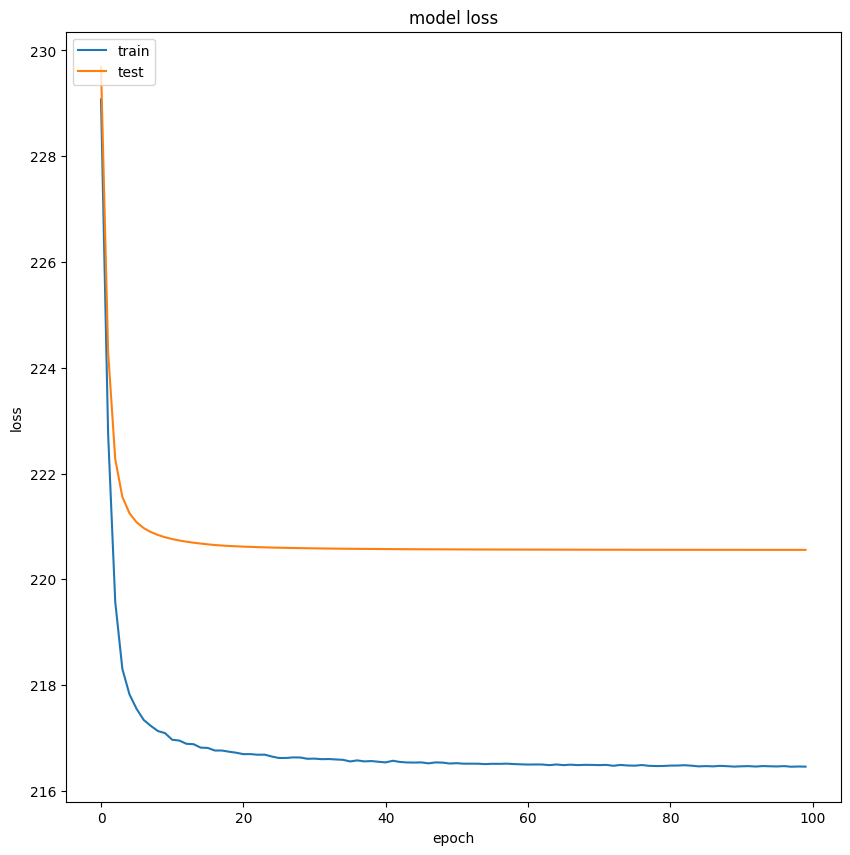

In [ ]:
# summarize history for MSE
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Conlusion
**Original Problem Statement**There is a need to understand what climate conditions are and will be. The need for this is to have proper warning to a big storm or possible climate changes, such as rainfall, far enough in advance to be aware of some of the following:
- Possible natural disasters
- Flooding
- Rain fall for irrigation systems

**Evaluation of Results** After conducting assessments to perfrom perdiction analysis, we have concluded that the methods/approaches are sound but we are limited the data we have. With this data we were able to find trends usable for prediction when narrowing the data down by each specific location. When using the data as a whole the locations are too broad (world-wide) to give any sort of accuracy which is understandable as climates vary from location to location around the globe. The best accuracy was when using temperature as a target, which makes sense as temperature is the most constant with trends out of all variables. However, percipitation is still the best variable to utilize moving forward as it gives a bigger picture towards sudden climate changes and incoming storms.

**Lessons Learned**
- More data is better
- A single location for training is key.
- Temperature or precipitation are ideal targets.

**Moving forward, what to do (A 2nd Iteration)** On a second iteration, the same modeling could be used but the key is the data. As proven in this attempt, data circled around a single area would be ideal. Now location is key, but quantity is also crucial. In this set, when we dialed down to one location, the trend and accuracy was much better then with all the data, but only an average of 40 data points existed per location which isnt enough for the ideal accuracy. The quantity of data will also help util;ize percipitation as the target as percipitation is too cyclical to have minimal data, as the constant shifts in value or spikes require more data to make it the normal instead of possible outliers.